In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('ggplot')

class CONFIG:

    NAMES_DTYPES = {
        "Source": str,
        "Production": np.float32
    }

current_directory = os.getcwd()
parent_folder_path = os.path.abspath(os.path.join(current_directory, "."))
data_folder_path = os.path.join(parent_folder_path, "data")
file_path = os.path.join(data_folder_path, "intermittent-renewables-production-france.csv")
data = pd.read_csv(
    file_path,
    index_col="Date and Hour",
    parse_dates=["Date and Hour", "Date"],
    dtype=CONFIG.NAMES_DTYPES
)

In [6]:
# Filtrar os valores maiores que 100
data_filtered = data.query("Production > 100")

# Ordenar os dados pelo 'Production' em ordem decrescente e selecionar os top 30 maiores
top_30_largest = data_filtered.nlargest(30, 'Production')

# Calcular a média dos 30 maiores
mean_top_30_largest = top_30_largest['Production'].mean()

# Ordenar os dados pelo 'Production' em ordem crescente e selecionar os top 30 menores
top_30_smallest = data_filtered.nsmallest(30, 'Production')

# Calcular a média dos 30 menores
mean_top_30_smallest = top_30_smallest['Production'].mean()

# Selecionar os dados excluindo os 30 maiores (do 1 ao 30)
excluded_top_30 = data_filtered.nsmallest(len(data_filtered) - 30, 'Production')

# Selecionar os 30 maiores na sequência (31-60)
top_30_next = data_filtered.nlargest(30, 'Production', keep='last')

# Concatenar os dois DataFrames
top_30_combined = pd.concat([excluded_top_30, top_30_next])

# Ordenar o DataFrame combinado pela data
top_30_combined = top_30_combined.sort_index()

# Calcular a média dos 30 maiores na sequência (31-60)
mean_top_30_combined = top_30_combined['Production'].mean()

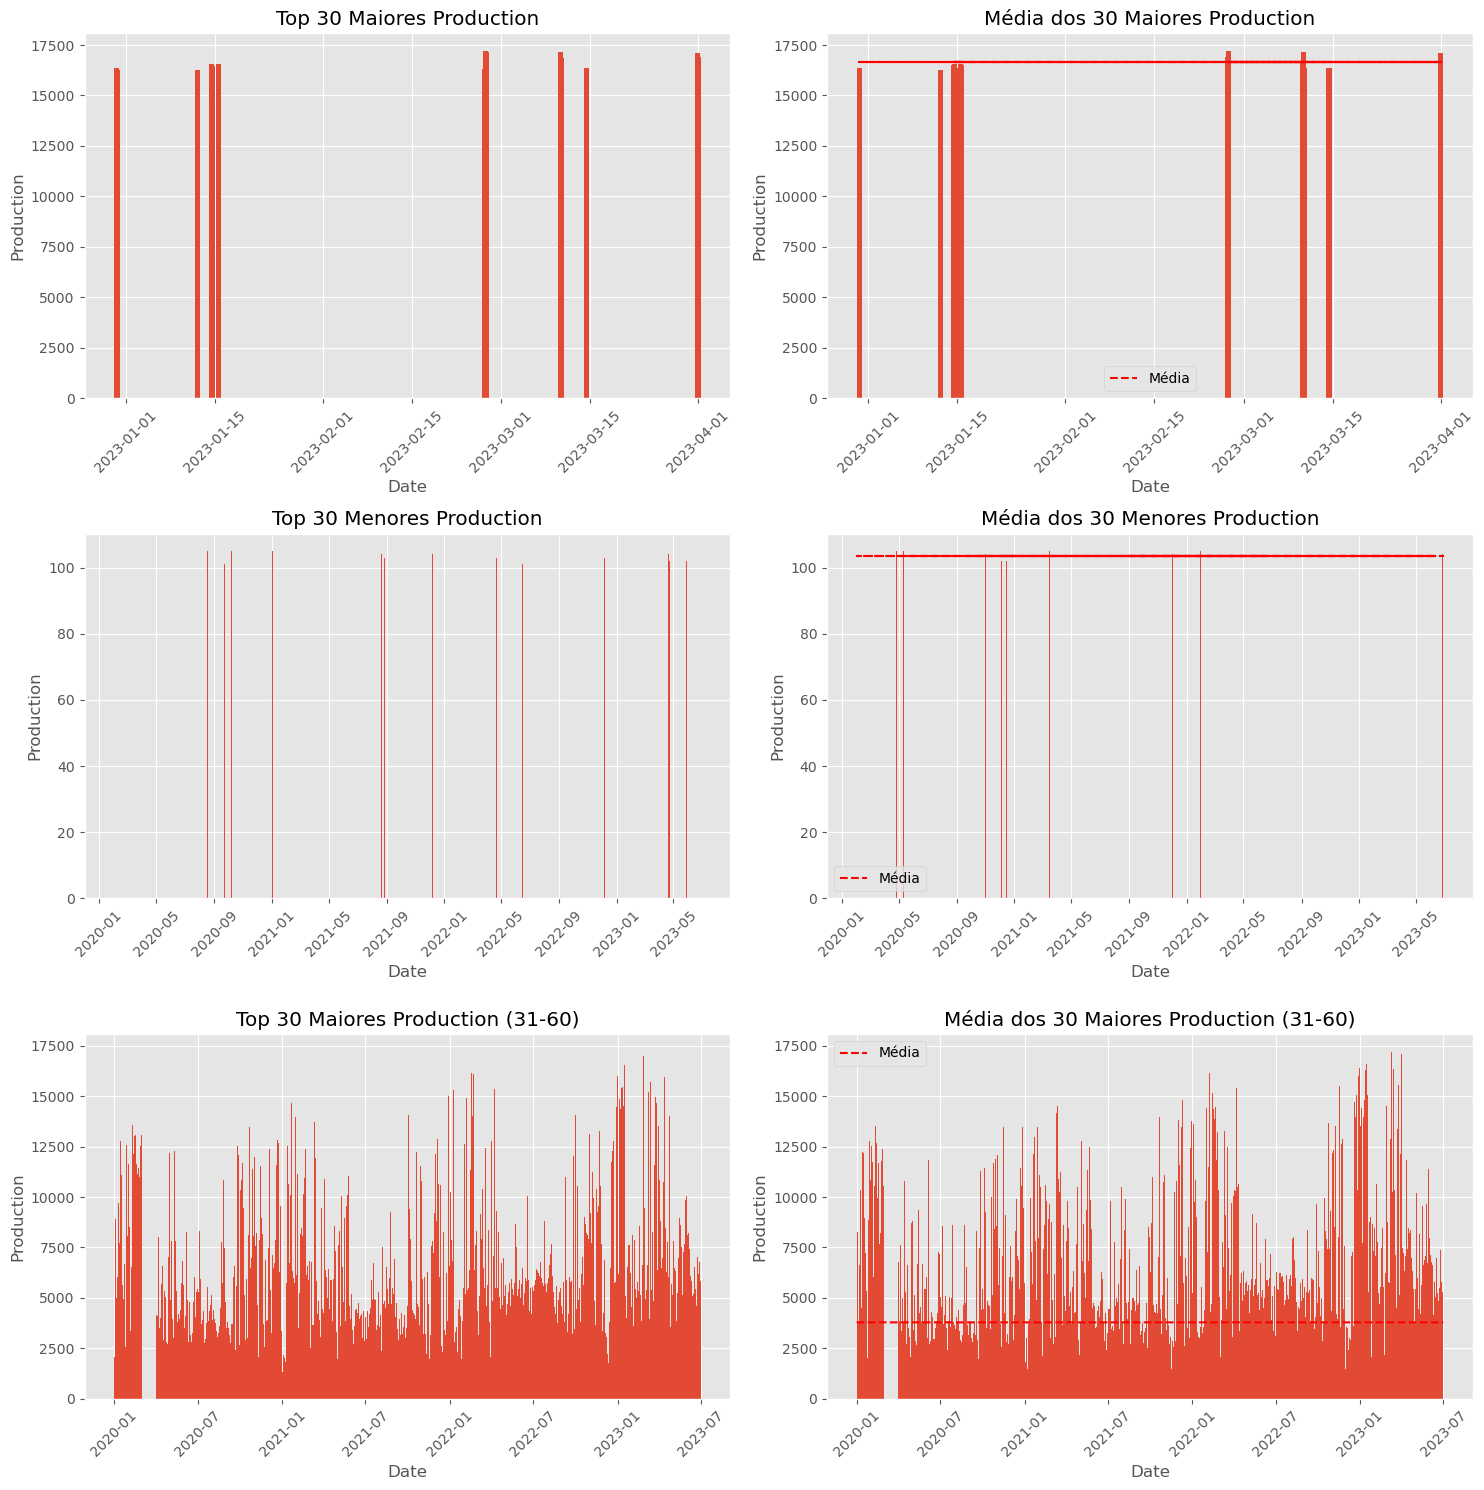

In [7]:
# Plotar todos os gráficos em um único output
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Gráfico 1: Top 30 maiores production
axes[0, 0].bar(top_30_largest.index, top_30_largest['Production'])
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Production')
axes[0, 0].set_title('Top 30 Maiores Production')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Média dos 30 maiores
axes[0, 1].plot(top_30_largest.index, [mean_top_30_largest] * len(top_30_largest), 'r--', label='Média')
axes[0, 1].bar(top_30_largest.index, top_30_largest['Production'])
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Production')
axes[0, 1].set_title('Média dos 30 Maiores Production')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend()

# Gráfico 3: Top 30 menores production
axes[1, 0].bar(top_30_smallest.index, top_30_smallest['Production'])
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Production')
axes[1, 0].set_title('Top 30 Menores Production')
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Média dos 30 menores
axes[1, 1].plot(top_30_smallest.index, [mean_top_30_smallest] * len(top_30_smallest), 'r--', label='Média')
axes[1, 1].bar(top_30_smallest.index, top_30_smallest['Production'])
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Production')
axes[1, 1].set_title('Média dos 30 Menores Production')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend()

# Gráfico 5: Top 30 Maiores Production (31-60)
axes[2, 0].bar(top_30_combined.index, top_30_combined['Production'])
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Production')
axes[2, 0].set_title('Top 30 Maiores Production (31-60)')
axes[2, 0].tick_params(axis='x', rotation=45)

# Gráfico 6: Média dos 30 Maiores Production (31-60)
axes[2, 1].plot(top_30_combined.index, [mean_top_30_combined] * len(top_30_combined), 'r--', label='Média')
axes[2, 1].bar(top_30_combined.index, top_30_combined['Production'])
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Production')
axes[2, 1].set_title('Média dos 30 Maiores Production (31-60)')
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].legend()

plt.tight_layout()
plt.show()